In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
from matplotlib.axes import Axes


In [ ]:
# site : keepjob
home_page="https://www.keejob.com"


In [ ]:
joblinks=[]
for i in range(1,5):
    # contact page 
    response=requests.get(f'https://www.keejob.com/offres-emploi/metiers/recrutement-informatique-multimedia/?page={i}')
    sp= BeautifulSoup(response.content,'lxml')
    joblist=sp.find_all("h6")
#     print(joblist)
    for item in joblist:
        for link in item.find_all('a',href=True):
#             print(link)
            joblinks.append(home_page+link['href'])
#             print(joblinks)
# print(joblinks)   
# https://www.keejob.com/offres-emploi/145382/data-scientist-hf/

In [ ]:
testlink="https://www.keejob.com/offres-emploi/145382/data-scientist-hf/"

In [ ]:
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [ ]:
jobs=[]
for link in joblinks:
    reponse=requests.get(link)
    sp=BeautifulSoup(reponse.content,"lxml")
    job_name=sp.find("h2",class_="job-title").text.strip()
    ps=sp.find("div", class_="text").text.replace('\n', '**').split('**')
    posted_on=ps[6]
    
    
    wk=[sp.find("div", class_="text").text.replace('\t', '').replace('\n','').replace(":","loc: ").strip()]
    place=[]
    for l in wk:
        place.append(re.findall("loc: \W+\w+\W+\w+",l,re.MULTILINE))
        
#     print(place)
#     Workplace= ' '.join(map(str, place))
    for j in place:
        for t in j:
            workplace=t
    
            workplace.replace(" ","")
#     print(workplace)
    ########################################################################
    st=[sp.find("div", class_="text").text.replace('\nBac','Bac').strip()]
    std=[]
    for i in st:
        std.append(re.findall("\w",i,re.MULTILINE))
    
    Study= ' '.join(map(str, std))
    #     print(Study)
    ########################################################################
    
    lg=[sp.find("div", class_="text").text.replace("\t","").replace("Langues:\n\n\n","-").replace("\n,\n\n",",")
       .replace("\n","-")]   
#     print(lg)
    LG=[]
    for i in lg:
        LG.append(re.findall("-[A-Za-z]+.?\w+,\w+-",i,re.MULTILINE))
#     print(LG)
    
#     Languages=st[33:34]+st[35:36]
    
    
    Languages= ' '.join(map(str, LG))
#     print(Languages)
    
    #################################################################################
    cmp=sp.find("div", class_="span9 content").text.replace('\n', '**').strip().split('**')
    # print(cmp)
    Company_name=cmp[2]
    Company_name= ' '.join(map(str, Company_name))
    # print(Company_name)
    Job_description=sp.find("div", class_="block_a span12 no-margin-left").text.replace('Imprimer','').replace('\t','').replace('«\xa0','').replace('-\xa0',' ').replace('\xa0','').replace('\n',' ').replace('\r',' ').split('**')
    Job_description = ' '.join(map(str, Job_description))
    sentence = nltk.sent_tokenize(Job_description)

    # print(sentence)
    # link_img=[]
    # img_cmp=sp.find_all('img')
    # link_img=[]
    # for image in img_cmp:

    #     link_img=image['src']
    # #     print(link_img)

    # #     print(link_img)
    # print(link_img)            



#     # print(name,"\n",posted_on,"\n",Workplace,"\n",Study,"\n",Languages,"\n",Company_name,"\n",Job_description)
    job={
         'job_name':job_name,
         'posted_on':posted_on,
         'workplace':workplace,
        'Study':Study,
         'Languages':Languages,
         'Company_name':Company_name,
         'Job_description':Job_description
    }
#     print(job)
 
    jobs.append(job)
    # print('saving job: ',jobs)







In [ ]:
# formatted_article_text = re.sub('[^a-zA-Z]', ' ', sentence )
# formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)
# stopwords = nltk.corpus.stopwords.words('french')

# word_frequencies = {}
# for word in nltk.word_tokenize(formatted_article_text):
#     if word not in stopwords:
#         if word not in word_frequencies.keys():
#             word_frequencies[word] = 1
#         else:
#             word_frequencies[word] += 1


In [ ]:
df = pd.DataFrame(jobs )
df.head()


In [41]:
df =pd.read_csv('jobs.csv')

In [43]:
df.to_csv('jobs.csv', index=False,header=None)
# 

In [44]:
df.shape

(60, 7)

In [45]:
df.rename(columns = {'job_name':'Target','Job_description':'Text' }, inplace = True)
df.head()

,Target,posted_on,workplace,Study,Languages,Company_name,Text
0,Développeur web,8 novembre 2023,"loc: Ezzahra, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...",[],NaN,Description de l'annonce: Nous sommes à la r...
1,WEB DESIGNER,8 novembre 2023,loc: La Manouba,"['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...","['-Arabe,Français,Anglais-']",NaN,Description de l'annonce: Société nouvelleme...
2,Designer graphique,8 novembre 2023,"loc: Tunis, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...","['-Français,Anglais-']",P A R T N E R R E C R U I T M E N T,Description de l'annonce: Nous recrutons pour...
3,Responsable Infra Systèmes et Réseaux,8 novembre 2023,"loc: Tunis, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...",[],S P B I S C,Description de l'annonce: Vous souhaitez int...
4,Développeur Medior .Net/C#,8 novembre 2023,"loc: Tunis, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...",[],B I N I T N S,Description de l'annonce: Binit Nearshore Ser...


In [46]:
df.to_csv('jobs.csv', index=False)
data = df


In [47]:
data.head()

,Target,posted_on,workplace,Study,Languages,Company_name,Text
0,Développeur web,8 novembre 2023,"loc: Ezzahra, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...",[],NaN,Description de l'annonce: Nous sommes à la r...
1,WEB DESIGNER,8 novembre 2023,loc: La Manouba,"['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...","['-Arabe,Français,Anglais-']",NaN,Description de l'annonce: Société nouvelleme...
2,Designer graphique,8 novembre 2023,"loc: Tunis, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...","['-Français,Anglais-']",P A R T N E R R E C R U I T M E N T,Description de l'annonce: Nous recrutons pour...
3,Responsable Infra Systèmes et Réseaux,8 novembre 2023,"loc: Tunis, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...",[],S P B I S C,Description de l'annonce: Vous souhaitez int...
4,Développeur Medior .Net/C#,8 novembre 2023,"loc: Tunis, ...","['D', 'é', 't', 'a', 'i', 'l', 's', 'd', 'e', ...",[],B I N I T N S,Description de l'annonce: Binit Nearshore Ser...


In [77]:
data_txt = data['Text']
data_txt

0     Description de l'annonce:  Nous sommes à la r...
Name: Text, dtype: object

In [48]:
data_target=data['Target'].unique()
data_target

array(['Développeur web', 'WEB DESIGNER', 'Designer graphique',
       'Responsable Infra Systèmes et Réseaux',
       'Développeur Medior .Net/C#', 'Android Developer',
       'Développeur Medior Microsoft Dynamics 365 CRM',
       'Développeur web (php/javascript)',
       "Responsable Système d'Information", 'Chef de projet',
       'Master en finance', 'Consultants SAP', 'Technicien informatique',
       'Webmaster', 'Stage Web Développement',
       'Service Desk Analyst H/F (langue Allemande)',
       'Service Desk Analyst H/F (langue Italienne)',
       'Service Desk Analyst / langue Espagnol',
       'TECHNICIEN SUPPORT LINUX N2 - 24/7 H/F',
       'UI/Web Developer Senior', 'Service Desk analyst H/F',
       'Senior QA Engineer', 'INGENIEURS SYSTEME ET RESEAU',
       'Graphic Designer / community manager', 'Graphiste',
       'technicien informatique',
       'Administrateur poste de Travail / L2 H/F',
       'TechLeader CyberSécurité', 'Chief Digital Officer (CDO)',
       '

In [49]:
data['Target'].shape

(60,)

In [50]:
target = data['Target']
target

0                                   Développeur web
1                                      WEB DESIGNER
2                                Designer graphique
3             Responsable Infra Systèmes et Réseaux
4                        Développeur Medior .Net/C#
5                                 Android Developer
6     Développeur Medior Microsoft Dynamics 365 CRM
7                  Développeur web (php/javascript)
8                 Responsable Système d'Information
9                                    Chef de projet
10                                Master en finance
11                                  Consultants SAP
12                          Technicien informatique
13                                        Webmaster
14                          Stage Web Développement
15      Service Desk Analyst H/F (langue Allemande)
16      Service Desk Analyst H/F (langue Italienne)
17           Service Desk Analyst / langue Espagnol
18           TECHNICIEN SUPPORT LINUX N2 - 24/7 H/F
19          

In [51]:
target_counts  = data['Target'].value_counts()
target_counts

Chief Digital Officer (CDO)                      2
Consultant Senior CyberSécurité                  2
TechLeader CyberSécurité                         2
UI/Web Developer Senior                          2
Android Developer                                2
Graphiste                                        2
Développeur Medior .Net/C#                       1
Help desk Italophone  H/F                        1
Service Desk analyst H/F                         1
Technicienne en Informatique                     1
ingénieur informatique industrielle              1
Service Desk Analyst / langue Espagnol           1
Master en finance                                1
Développeur web (php/javascript)                 1
Incident Response Analyst                        1
Technicien  en Maintenance informatique          1
Technicien informatique                          1
WEB DESIGNER                                     1
Développeur full stack                           1
Webmaster                      

In [52]:
target_counts_value = data['Target'].value_counts().values
target_counts_value



array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
len(target_counts_value)



54

In [54]:
len(data_target)


54

In [55]:
data_target 

array(['Développeur web', 'WEB DESIGNER', 'Designer graphique',
       'Responsable Infra Systèmes et Réseaux',
       'Développeur Medior .Net/C#', 'Android Developer',
       'Développeur Medior Microsoft Dynamics 365 CRM',
       'Développeur web (php/javascript)',
       "Responsable Système d'Information", 'Chef de projet',
       'Master en finance', 'Consultants SAP', 'Technicien informatique',
       'Webmaster', 'Stage Web Développement',
       'Service Desk Analyst H/F (langue Allemande)',
       'Service Desk Analyst H/F (langue Italienne)',
       'Service Desk Analyst / langue Espagnol',
       'TECHNICIEN SUPPORT LINUX N2 - 24/7 H/F',
       'UI/Web Developer Senior', 'Service Desk analyst H/F',
       'Senior QA Engineer', 'INGENIEURS SYSTEME ET RESEAU',
       'Graphic Designer / community manager', 'Graphiste',
       'technicien informatique',
       'Administrateur poste de Travail / L2 H/F',
       'TechLeader CyberSécurité', 'Chief Digital Officer (CDO)',
       '

In [56]:
len(data_target)

54

In [ ]:
# fig, axes = plt.subplots(1, 2, figsize=(111, 10))
# # sns.barplot(target_counts.index, target_counts, ax=axes[0])
# axes[1].pie(target_counts, labels=target_counts.keys(), autopct='%1.2f%%')
# plt.show()

In [60]:

data_target = data_target[:20]
len(data_target)
data_target


array(['Développeur web', 'WEB DESIGNER', 'Designer graphique',
       'Responsable Infra Systèmes et Réseaux',
       'Développeur Medior .Net/C#', 'Android Developer',
       'Développeur Medior Microsoft Dynamics 365 CRM',
       'Développeur web (php/javascript)',
       "Responsable Système d'Information", 'Chef de projet',
       'Master en finance', 'Consultants SAP', 'Technicien informatique',
       'Webmaster', 'Stage Web Développement',
       'Service Desk Analyst H/F (langue Allemande)',
       'Service Desk Analyst H/F (langue Italienne)',
       'Service Desk Analyst / langue Espagnol',
       'TECHNICIEN SUPPORT LINUX N2 - 24/7 H/F',
       'UI/Web Developer Senior'], dtype=object)

In [63]:
target_counts_value = target_counts_value[:20]
target_counts_value


array([2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# count_vectorizer = CountVectorizer(stop_words='english')
# words, word_values = get_top_n_words(n_top_words=25,
#                                      count_vectorizer=count_vectorizer,
#                                      text_data=reindexed_data)

# fig, ax = plt.subplots(figsize=(10,4))
# ax.bar(range(len(data_target)), target_counts);
# ax.set_xticks(range(len(words)));
# ax.set_xticklabels(words, rotation='vertical');
# ax.set_title('Top words in headlines dataset (excluding stop words)');
# ax.set_xlabel('Word');
# ax.set_ylabel('Number of occurences');
# plt.show()

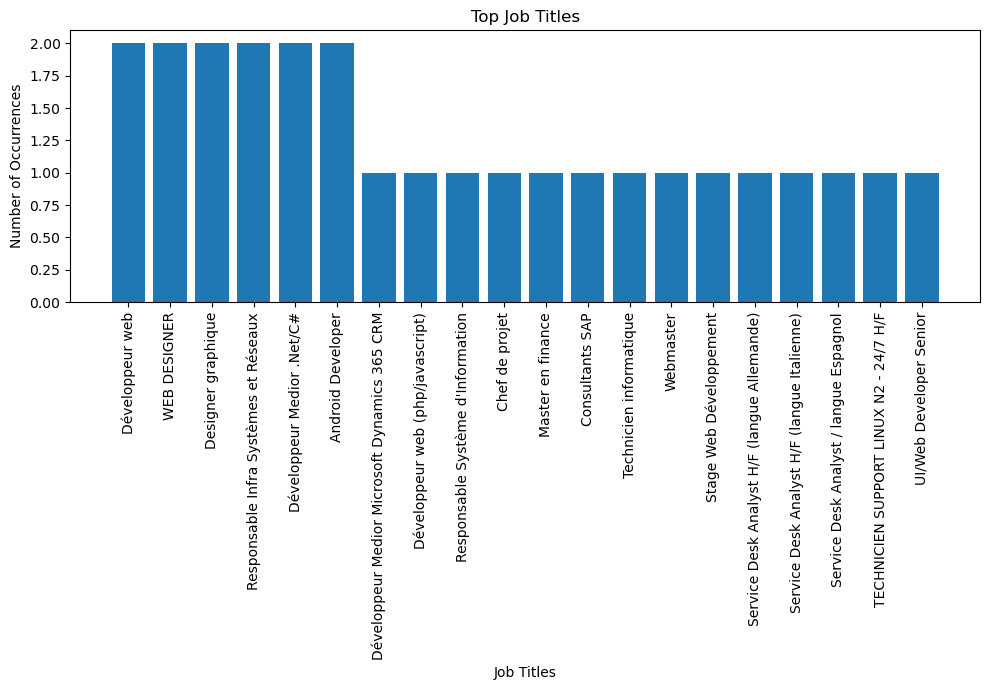

In [74]:



fig, ax = plt.subplots(figsize=(10, 7))

# Create a bar plot with the job titles on the x-axis and their counts on the y-axis
ax.bar(range(len(target_counts_value)), target_counts_value)

# Set x-axis ticks and labels
ax.set_xticks(range(len(target_counts_value)))
ax.set_xticklabels(data_target, rotation='vertical')

# Set labels and title for the plot
ax.set_xlabel('Job Titles')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Top Job Titles')

# Show the plot
plt.tight_layout()

plt.show()


In [84]:
datasets= df.to_csv('jobs.csv', index=False,header=None)


In [85]:
datasets

In [82]:
vec = TfidfVectorizer(stop_words="french")
vec.fit(datasets.text.values)
features = vec.transform(datasets.data.values)

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse


In [ ]:
X = df['Job_description']
y = df['job_name']

VecModel = TfidfVectorizer()
X_Vec = VecModel.fit_transform(X)

feature_names = VecModel.get_feature_names()
feature_names


In [ ]:

# c=pd.Series(X_Vec)
# c.plot(kind='pie')

In [ ]:
# X_Vec = pd.DataFrame(X_Vec)
# X_Vec = pd.DataFrame.spars.from_spmatrix(X_Vec)

X_Vec = pd.SparseDataFrame(X_Vec)
print(f'The new shape for X is {X_Vec.shape}')
X_Vec.head()


In [ ]:
for i in range(5) : 
    print(sorted(list(X_Vec.iloc[i,:]),reverse = True))
    print('--------------------------------------------------')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Vec, y, test_size=0.25, random_state=42)